In [8]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.options.display.float_format = '{:,.4f}'.format

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()


In [ ]:
def get_gurufocus(ticker, url):
    from selenium import webdriver
    from selenium.common.exceptions import TimeoutException
    
    browser = webdriver.Chrome(executable_path=r"C:\Users\Fang\Desktop\Python Trading\Trading\chromedriver.exe")
    
    if url == 'https://www.nyse.com':
        gurufocus = 'https://www.gurufocus.com/stock/NYSE:{}/dcf'.format(ticker)
    elif url == 'http://www.nasdaq.com':
        gurufocus = 'https://www.gurufocus.com/stock/NAS:{}/dcf'.format(ticker)
    else:
        gurufocus = 'https://www.gurufocus.com/stock/CBOE:{}/dcf'.format(ticker)
    
    browser.get(gurufocus)
    dcfs = [element.text for element in browser.find_elements_by_xpath("//div[contains(@class, 'el-form-item el-form-item--mini')]")]
    
    browser.quit()
    
    importants = list(filter(lambda x: 'Fair Value :' in x, dcfs)) + list(filter(lambda x: 'Margin Of Safety :' in x, dcfs)) + list(filter(lambda x: 'Growth Rate :' in x and 'Terminal' not in x, dcfs))

    return importants

In [ ]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException

browser = webdriver.Chrome(executable_path=r"C:\Users\Fang\Desktop\Python Trading\Trading\chromedriver.exe")

if url == 'https://www.nyse.com':
    gurufocus = 'https://www.gurufocus.com/stock/NYSE:{}/dcf'.format(ticker)
elif url == 'http://www.nasdaq.com':
    gurufocus = 'https://www.gurufocus.com/stock/NAS:{}/dcf'.format(ticker)
else:
    gurufocus = 'https://www.gurufocus.com/stock/CBOE:{}/dcf'.format(ticker)

browser.get(gurufocus)
dcfs = [element.text for element in browser.find_elements_by_xpath("//div[contains(@class, 'el-form-item el-form-item--mini')]")]

browser.quit()

importants = list(filter(lambda x: 'Fair Value :' in x, dcfs)) + list(filter(lambda x: 'Margin Of Safety :' in x, dcfs)) + list(filter(lambda x: 'Growth Rate :' in x and 'Terminal' not in x, dcfs))


In [ ]:
summaries_df = urls.copy()
del summaries_df['URL']
summaries_df['FinancialStrengthScore'] = np.nan
summaries_df['ProfitAndGrowthScore'] = np.nan

start_time = time.time()

i = 1

for ticker, row in urls.iterrows():
    try:
        if row.URL == 'https://www.nyse.com':
            gurufocus = 'https://www.gurufocus.com/stock/NYSE:{}/summary'.format(ticker)
        elif row.URL == 'http://www.nasdaq.com':
            gurufocus = 'https://www.gurufocus.com/stock/NAS:{}/summary'.format(ticker)
        soup = bs(requests.get(gurufocus).text,'lxml')
        summaries = [x.text.strip() for x in soup.select('h2[class="page-title"]')][:2]
        summaries = [int(x.split(':')[-1].strip().split('/')[0]) for x in summaries]
    except:
        continue
    
    try:
        summaries_df.loc[ticker,'FinancialStrengthScore'] = summaries[0]
    except:
        None
    
    try:
        summaries_df.loc[ticker,'ProfitAndGrowthScore'] = summaries[1]
    except:
        None
    
    print("Completed {0}% for {1}".format(str(round(i*100/len(gurus_df),2)),ticker))
    i += 1
end_time = time.time()
print("Completed in {} seconds.".format(end_time - start_time))

In [7]:
ticker = 'AAPL'
finviz_url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
finviz = bs(requests.get(finviz_url).text,'lxml').select_one('table[class="snapshot-table2"]')

In [11]:
for row in finviz.find_all('tr'):
    for col in row.find_all('td'):
        print(col.text)

Index
DJIA S&P500
P/E
15.67
EPS (ttm)
11.67
Insider Own
0.07%
Shs Outstand
4.63B
Perf Week
-4.26%
Market Cap
845.79B
Forward P/E
14.31
EPS next Y
12.77
Insider Trans
-4.04%
Shs Float
4.60B
Perf Month
-11.90%
Income
56.07B
PEG
1.31
EPS next Q
2.11
Inst Own
60.80%
Short Float
1.15%
Perf Quarter
6.85%
Sales
258.49B
P/S
3.27
EPS this Y
32.60%
Inst Trans
-2.88%
Short Ratio
1.79
Perf Half Y
-5.55%
Book/sh
22.65
P/B
8.07
EPS next Y
11.19%
ROA
16.00%
Target Price
216.17
Perf Year
-2.58%
Cash/sh
17.31
P/C
10.56
EPS next 5Y
12.00%
ROE
51.30%
52W Range
142.00 - 233.47
Perf YTD
15.87%
Dividend
2.92
P/FCF
18.53
EPS past 5Y
16.50%
ROI
26.60%
52W High
-23.57%
Beta
1.14
Dividend %
1.60%
Quick Ratio
1.30
Sales past 5Y
9.20%
Gross Margin
38.10%
52W Low
25.67%
ATR
5.29
Employees
132000
Current Ratio
1.30
Sales Q/Q
-5.10%
Oper. Margin
25.30%
RSI (14)
31.80
Volatility
1.98% 2.13%
Optionable
Yes
Debt/Eq
1.06
EPS Q/Q
-9.80%
Profit Margin
22.10%
Rel Volume
1.45
Prev Close
182.78
Shortable
Yes
LT Debt/Eq
0.85


In [14]:
import ffn
#%pylab inline
prices = ffn.get('mu,wdc,stx', start='2010-01-01')


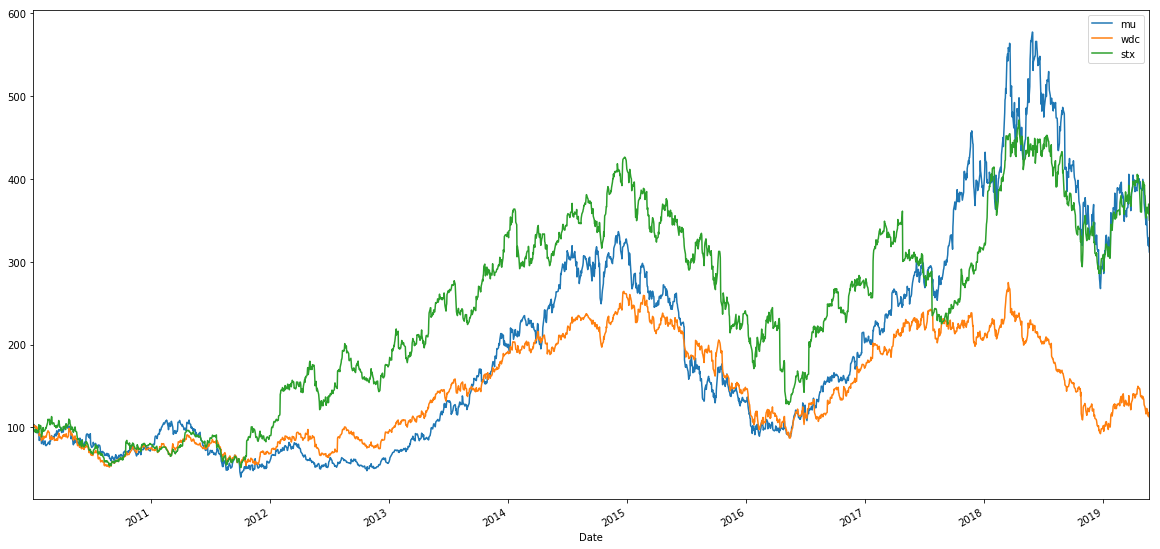

In [15]:
prices.rebase().plot(figsize = (20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFAE012278>,
      dtype=object)

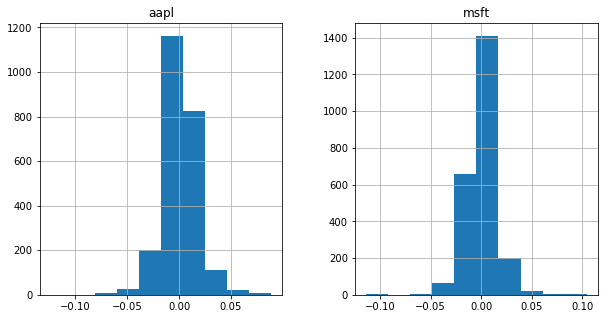

In [10]:
# now what do the return distributions look like?
returns = prices.to_returns().dropna()
returns.hist(figsize = (10, 5))

In [11]:
stats = prices.calc_stats()
stats.display()

Stat                 aapl        msft
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2019-05-23  2019-05-23
Risk-free rate       0.00%       0.00%

Total Return         781.33%     410.32%
Daily Sharpe         1.02        0.87
Daily Sortino        1.71        1.48
CAGR                 26.11%      18.98%
Max Drawdown         -40.12%     -26.37%
Calmar Ratio         0.65        0.72

MTD                  -10.47%     -3.81%
3m                   3.87%       13.20%
6m                   4.73%       22.40%
YTD                  14.39%      24.20%
1Y                   -3.53%      28.91%
3Y (ann.)            24.96%      38.53%
5Y (ann.)            17.36%      28.44%
10Y (ann.)           26.11%      18.98%
Since Incep. (ann.)  26.11%      18.98%

Daily Sharpe         1.02        0.87
Daily Sortino        1.71        1.48
Daily Mean (ann.)    26.65%      20.03%
Daily Vol (ann.)     26.13%      22.97%
Daily Skew           -0.12       0.0

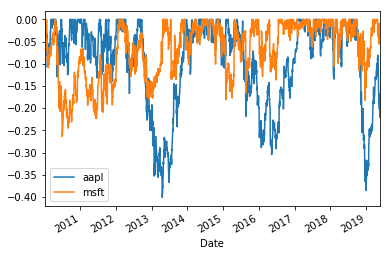

In [12]:
stats.prices.to_drawdown_series().plot()